# Шаргин Иван, Б01-905. Численное дифференцирование.

 В качестве функции возьмем координату от времени при затухающих колебаниях

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import math

In [2]:
A0 = 1 
attenuation = 0.1
period = 10
w = 2 * math.pi / period

In [3]:
def func(t, A0, attenuation, w):
    return A0 * np.exp(-attenuation * t) * np.sin(w * t)

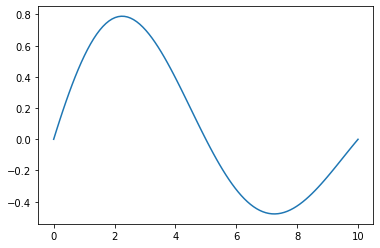

In [4]:
t = np.linspace(0, period, 100)
f = func(t, A0, attenuation, w)
plt.plot(t, f)

In [5]:
def real_dif_1(t, A0, attenuatuion, w):
    return A0 * np.exp(-attenuation * t) * (w * np.cos(w * t) - attenuation * np.sin(w * t))
    

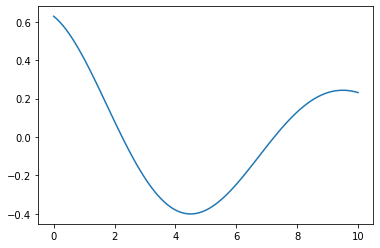

In [6]:
t = np.linspace(0, period, 100)
dif = real_dif_1(t, A0, attenuation, w)
plt.plot(t, dif)

In [7]:
def first_dif_1(func_cell, h):
    dif_cell = [0] * len(func_cell) 
    
    dif_cell[-1] = (func_cell[-1] - func_cell[-2]) / h
    
    for i in range (len(func_cell) - 1):
        dif_cell[i] = (func_cell[i+1] - func_cell[i]) / h
        
    return dif_cell
    

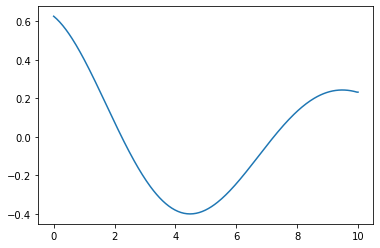

In [17]:
t = np.linspace(0, period, 300)
f = func(t, A0, attenuation, w)
dif_11 = first_dif_1(f, period / 299)
plt.plot(t, first_dif_1(f, period/299))
err = np.abs(dif_11 - real_dif_1(t, A0, attenuation, w))
# plt.plot(err)

In [19]:
N_min = 100
N_max = 10000
Er_array_11 = []
h_arr = []
for N in range (N_min, N_max):
    t = np.linspace(0, period, N)
    h = period / (N - 1)
    h_arr.append(h)
    func_cell = func(t, A0, attenuation, w)
    dif_11 = first_dif_1(func_cell, h)
    err = max(np.abs(dif_11 - real_dif_1(t, A0, attenuation, w)))
    Er_array_11.append(err)
    

    

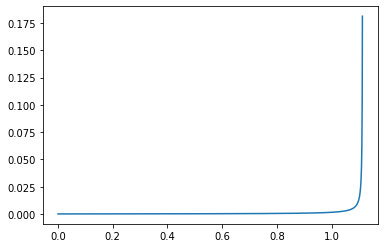

In [10]:
plt.plot(h_arr, Er_array_11)

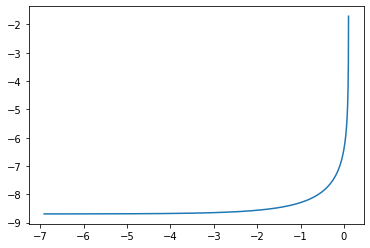

In [11]:
plt.plot(np.log(h_arr), np.log(Er_array_11))

In [14]:
print(Er_array_11[300])

0.0054317506546109895


In [33]:
def dif_12(func_cell, t):
    dif_12 = [0] * len(t)
    dif_12[0] = (-3 * func_cell[0] + 4 * func_cell[1] - func_cell[2]) / (t[2] - t[0])
    dif_12[-1] = (func_cell[-3] - 4 * func_cell[-2] + 3 * func_cell[-1]) / (t[-1] - t[-3])
     
    for i in range (1, len(func_cell) - 1):
        dif_12[i] = (func_cell[i+1] - func_cell[i-1]) / (t[i+1] - t[i-1])
        
    return dif_12
    

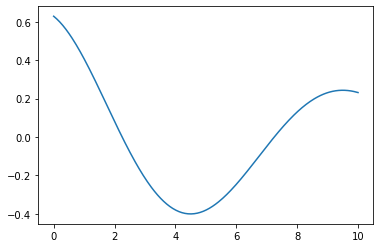

In [36]:
t = np.linspace(0, period, 300)
f = func(t, A0, attenuation, w)
D_12 = dif_12(f, t)
plt.plot(t, D_12)
err = np.abs(D_12 - real_dif_1(t, A0, attenuation, w))
# plt.plot(err)

In [40]:
N_min = 10
N_max = 10000
Er_array_12 = []
h_arr = []
for N in range (N_min, N_max):
    t = np.linspace(0, period, N)
    h = period / (N - 1)
    h_arr.append(h)
    func_cell = func(t, A0, attenuation, w)
    D_12 = dif_12(func_cell, t)
    err = max(np.abs(D_12 - real_dif_1(t, A0, attenuation, w)))
    Er_array_12.append(err)
    

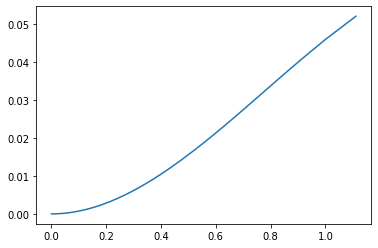

In [41]:
plt.plot(h_arr, Er_array_12)

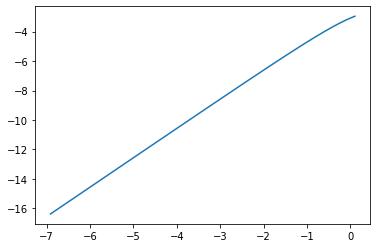

In [42]:
plt.plot(np.log(h_arr), np.log(Er_array_12))